<a href="https://colab.research.google.com/github/MoosaSaadat/handsonml/blob/master/handwritten_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
# Analyse sets
print(f"Training set: {x_train.shape}")
print(f"Testing set:  {x_test.shape}")

Training set: (60000, 28, 28)
Testing set:  (10000, 28, 28)


In [13]:
# Scale features
x_train, x_test = x_train / 255, x_test / 255

This is number '3'


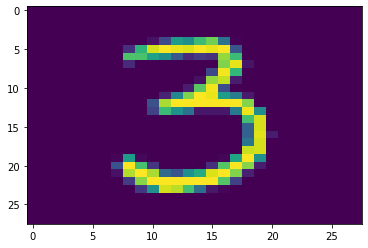

In [36]:
# Visualize data
idx = 50
print(f"This is number '{y_train[idx]}'")
plt.imshow(x_train[idx], aspect="auto")

In [14]:
# Create model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [31]:
predictions = model(x_train[:1]).numpy()
# maxVal = np.argmax(predictions)
print(predictions)
print(maxVal)
print(predictions[:, maxVal])

[[0.100194   0.09989178 0.09975328 0.09995789 0.09982061 0.10017902
  0.10007939 0.10005288 0.09988113 0.10019   ]]
0
[0.100194]
